In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import os
# use this: https://medium.com/@siladityaghosh/efficient-processing-of-large-csv-files-in-python-a-data-engineering-approach-3eabe3623416

In [18]:
gaze_data = '/home/selloh/external_projects/Transfer-Learning/Dreyeve/data/gaze_data.csv'

In [19]:
data = pd.read_csv(gaze_data)

# Data Exploration

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301251 entries, 0 to 1301250
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   file_number  1301251 non-null  int64 
 1   frame_etg    1301251 non-null  object
 2   frame_gar    1301251 non-null  object
 3   X            1263849 non-null  object
 4   Y            1263849 non-null  object
 5   event_type   1301251 non-null  object
 6   code         1301251 non-null  object
dtypes: int64(1), object(6)
memory usage: 69.5+ MB


In [21]:
data.describe()

,file_number
count,1.301251e+06
mean,3.745917e+01
std,2.139713e+01
min,1.000000e+00
25%,1.900000e+01
50%,3.800000e+01
75%,5.600000e+01
max,7.400000e+01


In [22]:
data.isnull().sum()

file_number        0
frame_etg          0
frame_gar          0
X              37402
Y              37402
event_type         0
code               0
dtype: int64

#event distribution type

In [23]:
event_type_counts = data['event_type'].value_counts()

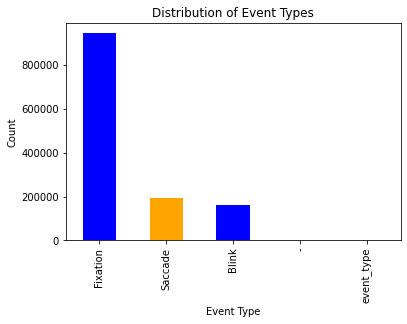

In [24]:
event_type_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.show()

In [25]:
def analyze_group(df): 
    result = df.groupby(df['event_type'].ne(df['event_type'].shift()).cumsum())['event_type'].value_counts()
    return result


In [26]:
grouped_results = data.groupby('file_number').apply(analyze_group)


In [27]:
#if i want to look at a specific file number in the columns:
results = grouped_results.xs(4, level='file_number')
results

event_type  event_type
1           event_type     1
2           Fixation       2
3           Saccade        3
4           Fixation      19
5           Saccade        4
                          ..
1404        Fixation      16
1405        Saccade        4
1406        Fixation       9
1407        Saccade        4
1408        Fixation       8
Name: count, Length: 1408, dtype: int64

In [28]:
grouped_results

file_number  event_type  event_type
1            1           event_type     1
             2           Fixation       1
             3           Saccade        4
             4           Fixation      40
             5           Saccade        7
                                       ..
74           1496        Fixation      14
             1497        Saccade        5
             1498        Fixation      51
             1499        Saccade        4
             1500        Fixation       2
Name: count, Length: 103323, dtype: int64

In [29]:
print(grouped_results.head())


file_number  event_type  event_type
1            1           event_type     1
             2           Fixation       1
             3           Saccade        4
             4           Fixation      40
             5           Saccade        7
Name: count, dtype: int64


In [30]:
print(grouped_results.index)

MultiIndex([( 1,    1, 'event_type'),
            ( 1,    2,   'Fixation'),
            ( 1,    3,    'Saccade'),
            ( 1,    4,   'Fixation'),
            ( 1,    5,    'Saccade'),
            ( 1,    6,   'Fixation'),
            ( 1,    7,    'Saccade'),
            ( 1,    8,   'Fixation'),
            ( 1,    9,    'Saccade'),
            ( 1,   10,   'Fixation'),
            ...
            (74, 1491,    'Saccade'),
            (74, 1492,   'Fixation'),
            (74, 1493,    'Saccade'),
            (74, 1494,   'Fixation'),
            (74, 1495,    'Saccade'),
            (74, 1496,   'Fixation'),
            (74, 1497,    'Saccade'),
            (74, 1498,   'Fixation'),
            (74, 1499,    'Saccade'),
            (74, 1500,   'Fixation')],
           names=['file_number', 'event_type', 'event_type'], length=103323)


# Fixation Analysis

In [31]:
fixation_rows = grouped_results[grouped_results.index.isin(['Fixation'], level=2)]

In [32]:
fixation_df = fixation_rows.to_frame(name='count').reset_index()



ValueError: cannot insert event_type, already exists

In [ ]:
fixation_df

file_number  event_type  event_type
1            2           Fixation       1
             4           Fixation      40
             6           Fixation      23
             8           Fixation       7
             10          Fixation       9
Name: event_type, dtype: int64

In [ ]:
fixation_rows.index

MultiIndex([( 1,    2, 'Fixation'),
            ( 1,    4, 'Fixation'),
            ( 1,    6, 'Fixation'),
            ( 1,    8, 'Fixation'),
            ( 1,   10, 'Fixation'),
            ( 1,   12, 'Fixation'),
            ( 1,   14, 'Fixation'),
            ( 1,   16, 'Fixation'),
            ( 1,   18, 'Fixation'),
            ( 1,   20, 'Fixation'),
            ...
            (74, 1482, 'Fixation'),
            (74, 1484, 'Fixation'),
            (74, 1486, 'Fixation'),
            (74, 1488, 'Fixation'),
            (74, 1490, 'Fixation'),
            (74, 1492, 'Fixation'),
            (74, 1494, 'Fixation'),
            (74, 1496, 'Fixation'),
            (74, 1498, 'Fixation'),
            (74, 1500, 'Fixation')],
           names=['file_number', 'event_type', 'event_type'], length=51471)

In [ ]:
#if i want to look at a specific file number in the columns:
fixation_rows.xs(35, level='file_number')


event_type  event_type
2           Fixation       1
4           Fixation       6
6           Fixation      23
8           Fixation      13
10          Fixation      16
                          ..
1434        Fixation       9
1436        Fixation       8
1438        Fixation      10
1440        Fixation      20
1442        Fixation      14
Name: event_type, Length: 721, dtype: int64

In [ ]:
#compare the different fixations for different weather conditions

# Blink Analysis

In [ ]:
blink_rows = grouped_results[grouped_results.index.isin(['Blink'], level=2)]

In [ ]:
blink_rows

file_number  event_type  event_type
1            15          Blink          32
             41          Blink           9
             107         Blink          33
             119         Blink         129
             121         Blink          27
                                      ... 
74           1463        Blink          11
             1475        Blink          45
             1477        Blink          72
             1479        Blink           8
             1487        Blink           8
Name: event_type, Length: 6835, dtype: int64

# Saccade Analysis

In [ ]:
saccade_rows = grouped_results[grouped_results.index.isin(['Saccade'], level=2)]

In [ ]:
saccade_rows 

file_number  event_type  event_type
1            3           Saccade        4
             5           Saccade        7
             7           Saccade       10
             9           Saccade        2
             11          Saccade        3
                                       ..
74           1491        Saccade        6
             1493        Saccade        3
             1495        Saccade        5
             1497        Saccade        5
             1499        Saccade        4
Name: event_type, Length: 44789, dtype: int64